In [36]:
import pandas as pd
import joblib
from pycaret.regression import *
from pycaret.regression import RegressionExperiment
import shap

# Inicialización de un experimentod de Regresion

In [18]:
exp = RegressionExperiment()

In [19]:
df = pd.read_csv("Prueba de modelamiento para Cientifico de Datos 2023.csv", sep=';', encoding="latin-1")
categorical_cols = ['fabricaAlimento', 'granja_anonym', 'genética', 'asesor']
numerical_cols = ['pesoInicial', 'pesoFinal', 'semesreSalida', 'mortalidad']
target = "conversionAlimenticia"

In [20]:
data = df.loc[:, categorical_cols+numerical_cols+[target]]
data

,fabricaAlimento,granja_anonym,genética,asesor,pesoInicial,pesoFinal,semesreSalida,mortalidad,conversionAlimenticia
0,pp_0,gr_0,lg_0,rt_0,30.9500,103.5600,2,2.65,2.1760
1,pp_0,gr_0,lg_0,rt_0,26.6100,100.6400,2,6.97,2.2090
2,pp_0,gr_0,lg_0,rt_0,28.3200,102.0700,2,4.43,2.1350
3,pp_0,gr_0,lg_0,rt_0,29.3400,114.1200,1,2.40,2.1050
4,pp_0,gr_0,lg_0,rt_0,34.0400,118.6400,1,2.12,2.2220
...,...,...,...,...,...,...,...,...,...
2520,pp_2,gr_81,lg_0,rt_12,37.6400,95.9700,1,2.99,2.4900
2521,pp_8,gr_69,lg_0,rt_18,32.6621,122.3664,1,2.71,2.2959
2522,pp_0,gr_85,lg_0,rt_0,27.7200,95.8500,1,2.06,2.0900
2523,pp_0,gr_30,lg_0,rt_0,28.0400,84.5100,2,1.95,2.1400


In [21]:
s = setup(data, target=target, session_id=2025)

,Description,Value
0,Session id,2025
1,Target,conversionAlimenticia
2,Target type,Regression
3,Original data shape,"(2525, 9)"
4,Transformed data shape,"(2525, 23)"
5,Transformed train set shape,"(1767, 23)"
6,Transformed test set shape,"(758, 23)"
7,Numeric features,4
8,Categorical features,4
9,Preprocess,True


# Dado un conjunto de modelos, encontrar el mejor segun la metrica MAE

In [22]:
best = compare_models(sort="MAE", include=["gbr", "rf", "dt", "xgboost", "lr", "ridge"])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0811,0.0124,0.1112,0.4631,0.0342,0.0363,0.1840
gbr,Gradient Boosting Regressor,0.0839,0.0129,0.1134,0.4416,0.0348,0.0375,0.0950
xgboost,Extreme Gradient Boosting,0.0865,0.0137,0.1171,0.4031,0.0360,0.0387,0.0740
ridge,Ridge Regression,0.0874,0.0140,0.1181,0.3967,0.0363,0.0391,0.0290
lr,Linear Regression,0.0878,0.0139,0.1180,0.3967,0.0363,0.0394,0.0280
dt,Decision Tree Regressor,0.1106,0.0237,0.1535,-0.0409,0.0471,0.0496,0.0280


In [23]:
comparison_table = pull()

In [24]:
comparison_table.to_csv('comparacion_modelos.csv', index=False)

In [25]:
save_model(best, 'best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['pesoInicial', 'pesoFinal',
                                              'semesreSalida', 'mortalidad'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['fabricaAlimento', 'granja_anonym',
                                              'genética', 'asesor'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_e...
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('rest_encoding',
                  TransformerWrapper(include=['granja_anonym', 'asesor'],
                                     transformer=TargetEncoder(cols=['granja_anonym',
             

In [26]:
joblib.dump(best, 'best.joblib')

['best.joblib']

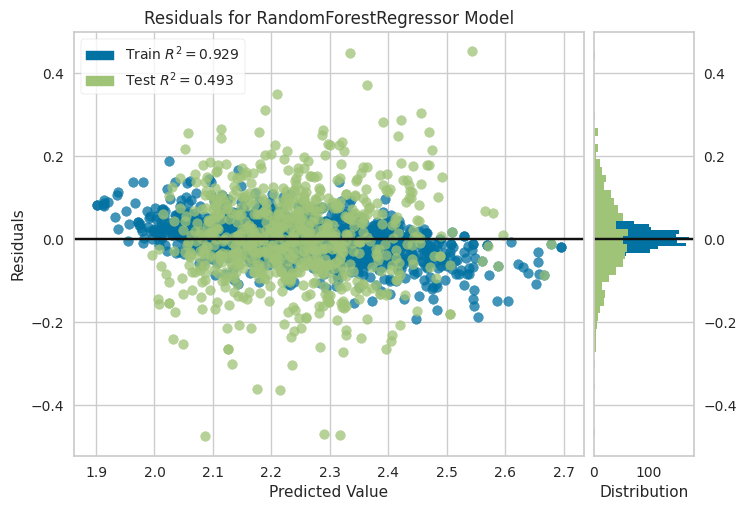

In [27]:
plot_model(best, plot = 'residuals')

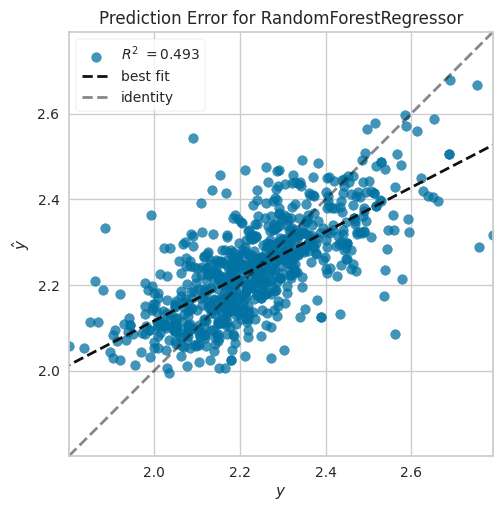

In [29]:
plot_model(best, plot = 'error')

In [31]:
X_test = get_config('X_test_transformed')
y_test = get_config('y_test_transformed')
X_train = get_config('X_train_transformed')
y_train = get_config('y_train_transformed')
X = pd.concat([X_train, X_test])


In [32]:
X

,fabricaAlimento_pp_3,fabricaAlimento_pp_8,fabricaAlimento_pp_0,fabricaAlimento_pp_7,fabricaAlimento_pp_1,fabricaAlimento_pp_2,fabricaAlimento_pp_5,fabricaAlimento_pp_6,fabricaAlimento_pp_4,granja_anonym,...,genética_lg_1,genética_lg_2,genética_lg_3,genética_lg_4,genética_lg_6,asesor,pesoInicial,pesoFinal,semesreSalida,mortalidad
1477,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.186137,...,0.0,0.0,0.0,0.0,0.0,2.229261,25.879900,119.705399,2.0,2.59
905,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.166770,...,0.0,0.0,0.0,0.0,0.0,2.218434,31.376699,124.130798,1.0,0.66
55,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.057488,...,0.0,0.0,0.0,0.0,0.0,2.062038,30.879999,108.650002,2.0,0.00
1708,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.236066,...,0.0,0.0,0.0,0.0,0.0,2.237405,27.690001,109.900002,1.0,2.78
2487,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.253871,...,0.0,0.0,0.0,0.0,0.0,2.178378,24.590000,89.309998,1.0,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.057488,...,0.0,0.0,0.0,0.0,0.0,2.062038,29.209999,96.209999,1.0,2.37
596,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.261081,...,0.0,0.0,0.0,0.0,0.0,2.158800,34.767601,101.818901,2.0,0.96
949,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.303516,...,0.0,1.0,0.0,0.0,0.0,2.215683,49.178699,116.223701,1.0,1.16
1416,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.221149,...,1.0,0.0,0.0,0.0,0.0,2.225609,30.504900,118.714699,2.0,0.00


In [37]:
model = joblib.load('best.joblib')
model

RandomForestRegressor(n_jobs=-1, random_state=2025)

In [40]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

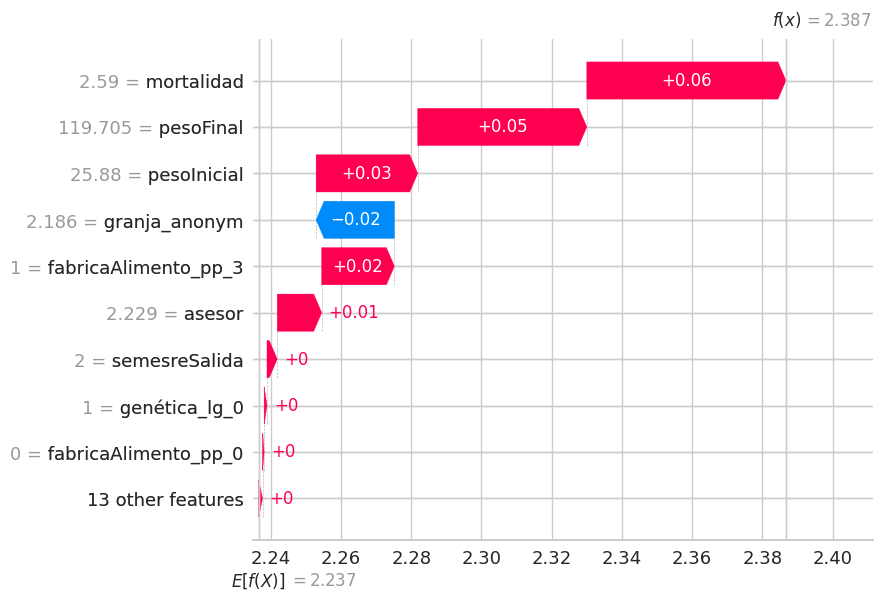

In [41]:
shap.plots.waterfall(shap_values[0])

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

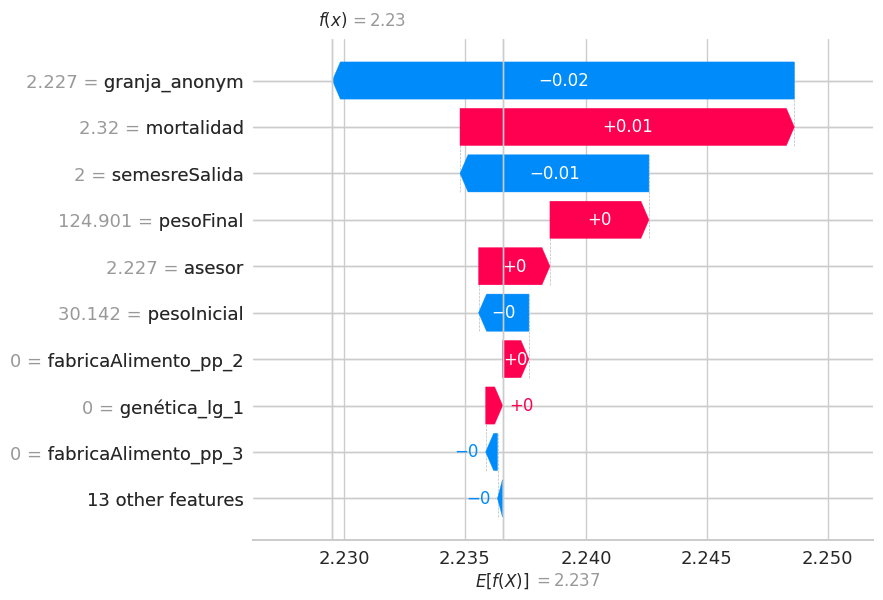

In [42]:
shap.plots.waterfall(shap_values[87])

In [43]:
shap.plots.force(shap_values[0])

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

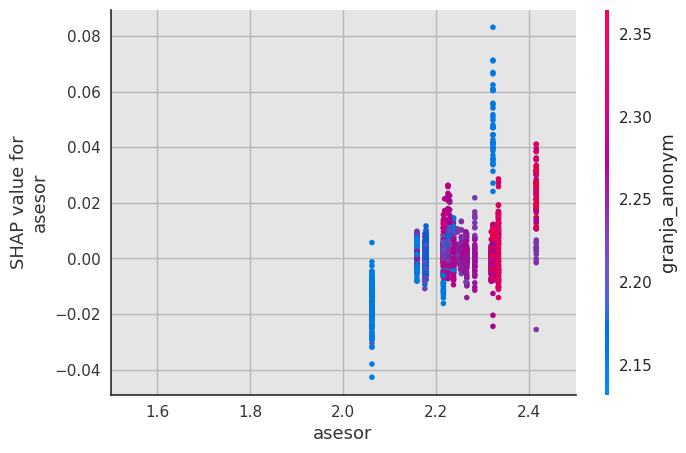

In [44]:
shap.plots.scatter(shap_values[:, "asesor"], color=shap_values)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

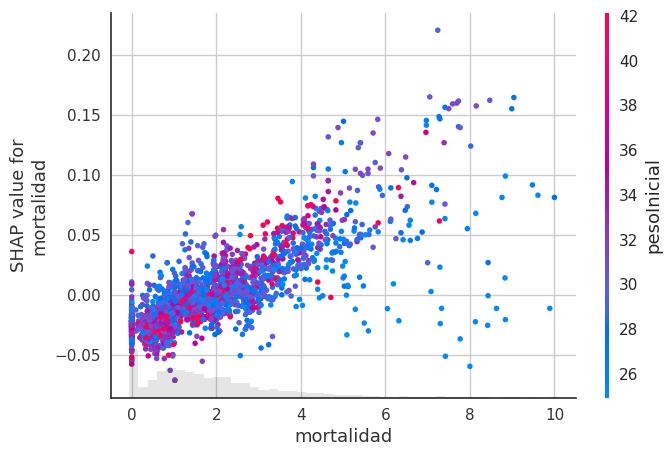

In [45]:
shap.plots.scatter(shap_values[:, "mortalidad"], color=shap_values)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

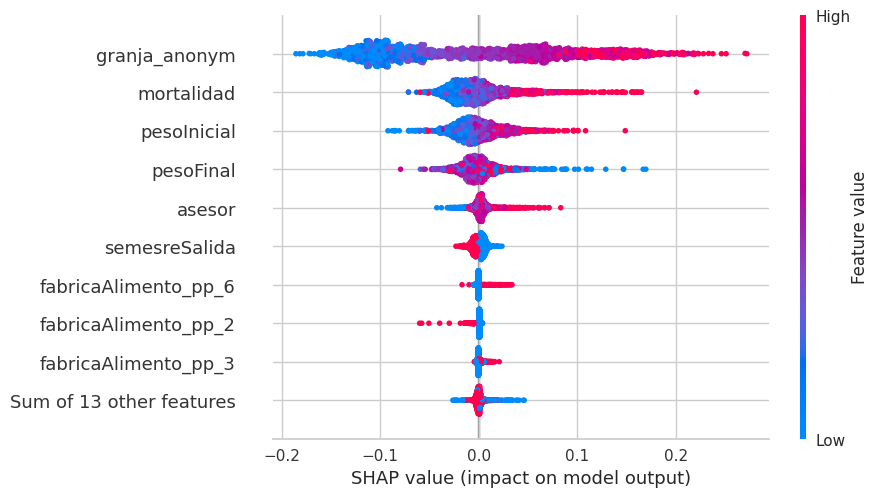

In [46]:
shap.plots.beeswarm(shap_values)

In [47]:
X.columns

Index(['fabricaAlimento_pp_3', 'fabricaAlimento_pp_8', 'fabricaAlimento_pp_0',
       'fabricaAlimento_pp_7', 'fabricaAlimento_pp_1', 'fabricaAlimento_pp_2',
       'fabricaAlimento_pp_5', 'fabricaAlimento_pp_6', 'fabricaAlimento_pp_4',
       'granja_anonym', 'genética_lg_0', 'genética_lg_5', 'genética_lg_1',
       'genética_lg_2', 'genética_lg_3', 'genética_lg_4', 'genética_lg_6',
       'asesor', 'pesoInicial', 'pesoFinal', 'semesreSalida', 'mortalidad'],
      dtype='object')

In [58]:
X['granja_anonym'].value_counts()

granja_anonym
2.133784    250
2.057488    119
2.334120    117
2.187319     92
2.173648     85
           ... 
2.283860      6
2.257441      6
2.284621      6
2.236627      5
2.236851      4
Name: count, Length: 87, dtype: int64

In [55]:
data["granja_anonym"].value_counts(normalize=False)

granja_anonym
gr_48    250
gr_2     119
gr_18    117
gr_70     92
gr_0      85
        ... 
gr_31      6
gr_84      6
gr_86      6
gr_66      5
gr_71      4
Name: count, Length: 87, dtype: int64

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

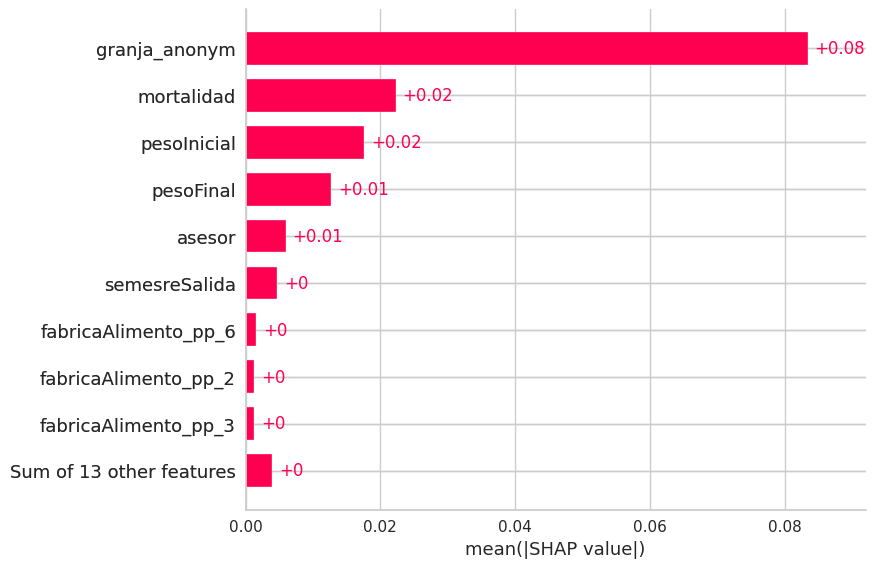

In [56]:
shap.plots.bar(shap_values)